In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import Preprocessing
from circle import circleDrawing
import SepFilter as sp
import pandas as pd

width = 320
height = 240

In [2]:
img = cv2.imread('Coconuts\coconut.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:

# dim = (width, height)
# new_img = cv2.resize(img, dim)
#cv2.imshow('graycsale image',img)
#plt.imshow(new_img, cmap = 'gray')

In [4]:
img1 = Preprocessing.preprocessing(img)
# plt.imshow(img1, cmap = 'gray')

Current Width:  539
Current Height:  408
320 242


In [5]:
# img2 = sp.sepFil(img1,)

In [6]:
# R = 50
# bordersize = R
# img_bordered = cv2.copyMakeBorder(
#     img1,
#     top=bordersize,
#     bottom=bordersize,
#     left=bordersize,
#     right=bordersize,
#     borderType=cv2.BORDER_CONSTANT,
#     value=[0]
# )


In [7]:

# fig, ax = plt.subplots(1,2)
# ax[0].imshow(img1, cmap = 'gray')
# ax[0].set_title("original")
# ax[1].imshow(img_bordered, cmap = 'gray')
# ax[1].set_title("after padding")

In [8]:
# cv2.imshow('picture prepocessed',border)
# cv2.waitKey()

In [9]:
#img_blank = np.zeros( img_bordered.shape) 
#img_blank =  cv2.cvtColor(img_blank, cv2.COLOR_GRAY2BGR)
#[2*R+height, 2*R+width]
#plt.imshow( img_blank, cmap = 'gray')
img_blank = np.zeros( img1.shape) 
img_blank.shape

(240, 320)

In [10]:
# plt.imshow(circleDrawing(  10, 10, 10, width, height), cmap='gray')
#plt.imshow(img_blank, cmap='gray')
def distance_list(height_size, width_size, pos_x, pos_y):
    height_list = np.arange(height_size)
    width_list = np.arange(width_size)

    # distance calculation of all matrix elements to the center of the circle
    y_diff_list = np.power(height_list - pos_y, 2)
    x_diff_list = np.power(width_list - pos_x, 2)  
    return x_diff_list, y_diff_list

(240, 320)

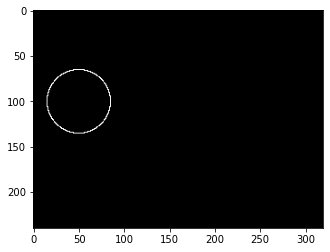

In [11]:
a_test = circleDrawing(50,100,35,width,height)
a_test = a_test + img_blank
plt.imshow(a_test, cmap='gray')
a_test.shape

In [12]:
rr = 34
for i in range(0, height):
    for j in range(0, width):
        if a_test[i,j]>0:
            img_blank = img_blank + circleDrawing(  i, j, rr, width, height)     

In [13]:
# ********** with padding
#  rr = 23
# for i in range(R, R+height):
#     for j in range(R, R+width):
#         if a_test[i,j]>0:
#             img_blank = img_blank + circleDrawing(  i, j, rr, width, height)            

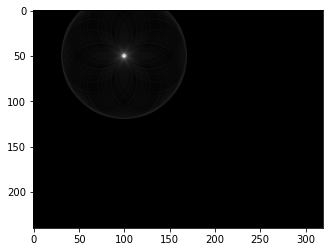

In [14]:
plt.imshow(img_blank,cmap='gray')

In [15]:
# print(img_blank[50:100,50:100])


In [16]:
pd_img = pd.DataFrame(img_blank)

array([[ 0.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 11., 12., 11., 12.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 11., 13., 12., 12., 11.],
       [ 0.,  0.,  0.,  0.,  0., 12., 15., 16., 14., 14.],
       [ 0.,  0.,  0.,  0.,  0., 11., 14., 18., 16., 16.],
       [11., 11., 11., 12., 11., 12., 15., 19., 21., 19.],
       [ 0., 12., 13., 15., 14., 15., 16., 20., 25., 26.],
       [ 0., 11., 12., 16., 18., 19., 20., 22., 29., 35.],
       [ 0., 12., 12., 14., 16., 21., 25., 29., 36., 53.],
       [ 0.,  0., 11., 14., 16., 19., 26., 35., 53., 89.],
       [ 0.,  0.,  0., 12., 14., 18., 26., 36., 66., 93.],
       [ 0.,  0., 11., 14., 16., 19., 26., 35., 53., 89.],
       [ 0., 12., 12., 14., 16., 21., 25., 29., 36., 53.],
       [ 0., 11., 12., 16., 18., 19., 20., 22., 29., 35.],
       [ 0., 12., 13., 15., 14., 15., 16., 20., 25., 26.],
       [11., 11., 11., 12., 11., 12., 15., 19., 21., 19.],
       [ 0.,  0.,  0.,  0.,  0., 11., 14., 18., 16., 16.

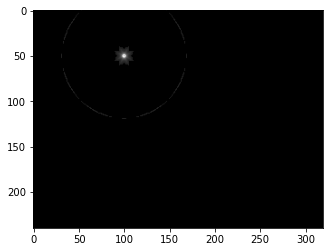

In [17]:
new_img = pd_img[pd_img>10].fillna(0)
new_img = pd.DataFrame.to_numpy(new_img)
plt.imshow(new_img, cmap='gray')
# cv2.imwrite("circled.png",new_img)
new_img[40:60,90:100]